<a href="https://colab.research.google.com/github/sandalis05/MIT-FutureMakers/blob/main/Building%20Autoencoders/Building_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import keras
from keras import layers
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [19]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [20]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [23]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [26]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0989 - val_loss: 0.0978
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0988 - val_loss: 0.0978
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0987 - val_loss: 0.0977
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0987 - val_loss: 0.0977
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0986 - val_loss: 0.0976
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0986 - val_loss: 0.0976
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0985 - val_loss: 0.0975
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0984 - val_loss: 0.0975
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0984 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0984 - val_lo

In [27]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

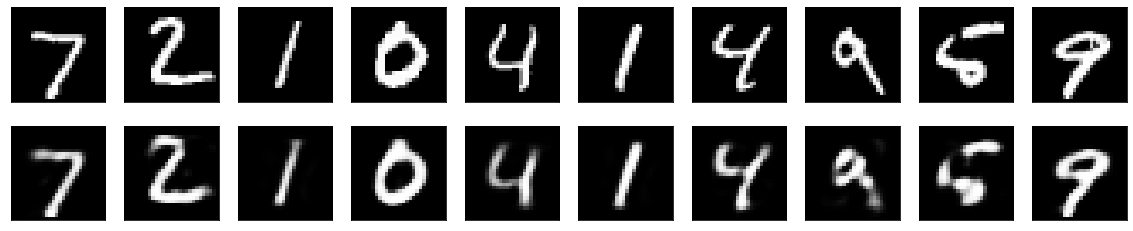

In [28]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [32]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 14s 56ms/step - loss: 0.1556 - val_loss: 0.1386
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1359 - val_loss: 0.1253
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1246 - val_loss: 0.1167
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1169 - val_loss: 0.1121
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1125 - val_loss: 0.1087
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1092 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1066 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1044 - val_loss: 0.1028
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1025 - val_loss: 0.1004
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1009 - val_l

In [34]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [36]:
tensorboard --logdir=/tmp/autoencoder

SyntaxError: ignored

In [37]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 85s 176ms/step - loss: 0.3015 - val_loss: 0.1480
Epoch 2/50
469/469 [==============================] - 82s 175ms/step - loss: 0.1429 - val_loss: 0.1298
Epoch 3/50
469/469 [==============================] - 81s 173ms/step - loss: 0.1274 - val_loss: 0.1199
Epoch 4/50
469/469 [==============================] - 82s 174ms/step - loss: 0.1195 - val_loss: 0.1151
Epoch 5/50
469/469 [==============================] - 82s 176ms/step - loss: 0.1151 - val_loss: 0.1113
Epoch 6/50
469/469 [==============================] - 80s 170ms/step - loss: 0.1117 - val_loss: 0.1083
Epoch 7/50
469/469 [==============================] - 80s 170ms/step - loss: 0.1091 - val_loss: 0.1065
Epoch 8/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1070 - val_loss: 0.1046
Epoch 9/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1054 - val_loss: 0.1035
Epoch 10/50
469/469 [==============================] - 80s 171ms/step - l

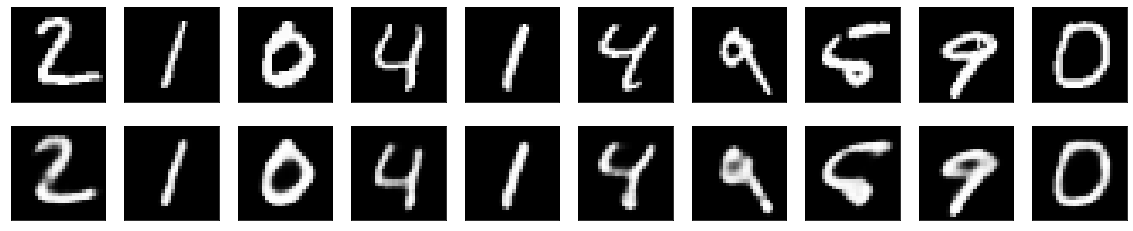

In [38]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

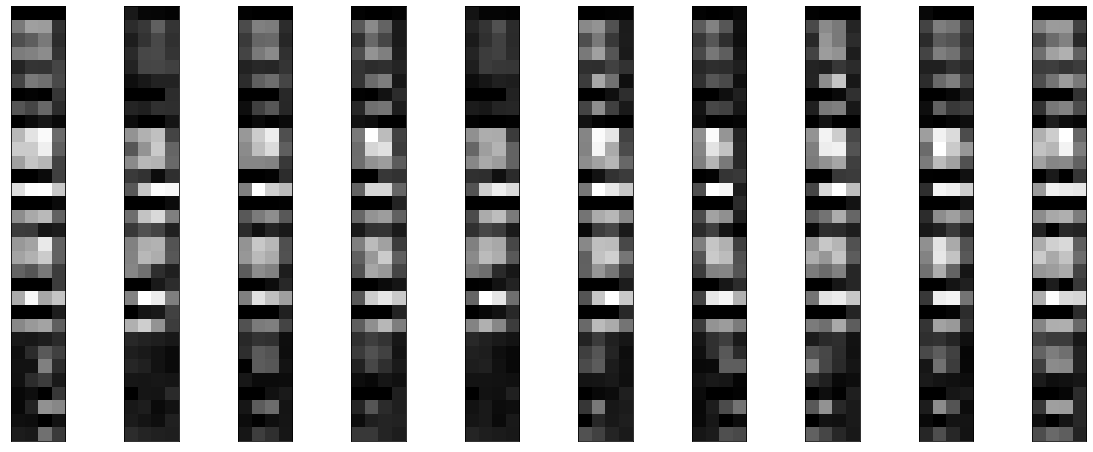

In [39]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [40]:
#image denoising

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

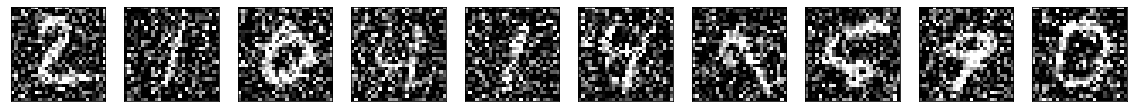

In [41]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [44]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/10
469/469 [==============================] - 153s 326ms/step - loss: 0.1508 - val_loss: 0.1153
Epoch 2/10
469/469 [==============================] - 153s 325ms/step - loss: 0.1131 - val_loss: 0.1092
Epoch 3/10
469/469 [==============================] - 151s 321ms/step - loss: 0.1083 - val_loss: 0.1056
Epoch 4/10
469/469 [==============================] - 152s 324ms/step - loss: 0.1056 - val_loss: 0.1035
Epoch 5/10
469/469 [==============================] - 154s 328ms/step - loss: 0.1036 - val_loss: 0.1019
Epoch 6/10
469/469 [==============================] - 152s 323ms/step - loss: 0.1021 - val_loss: 0.1006
Epoch 7/10
469/469 [==============================] - 151s 322ms/step - loss: 0.1010 - val_loss: 0.0997
Epoch 8/10
469/469 [==============================] - 152s 325ms/step - loss: 0.1001 - val_loss: 0.0990
Epoch 9/10
469/469 [==============================] - 152s 325ms/step - loss: 0.0994 - val_loss: 0.0983
Epoch 10/10
469/469 [==============================] - 152s 324m

In [48]:
# variational encoders - more modern

original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [49]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [50]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [51]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=5,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 221.1336 - val_loss: 168.6000
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 168.5081 - val_loss: 164.3117
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 163.7621 - val_loss: 161.4632
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 160.6926 - val_loss: 159.7432
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 158.7088 - val_loss: 158.2013


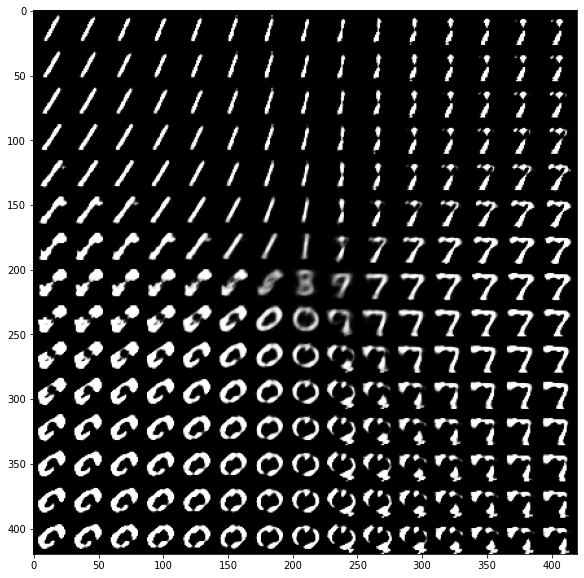

In [57]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()